# 1. 문제 정의 및 설명

## 문제 정의


#### 코비 의 슟 시도 데이터 25000개를 통해 5000개의 슟 시도 성공/실패를 예측하자.


## 문제 설명

This data contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. Your task is to predict whether the basket went in (shot_made_flag).

이 데이터는 코비 브라이언트 20년 선수생활의 경기 슟 시도에 대한 위치 그리고 환경을 포함하고 있습니다.

당신의 임무는 슟의 성규 여부를 예측하는 것 입니다.

We have removed 5000 of the shot_made_flags (represented as missing values in the csv file). These are the test set shots for which you must submit a prediction. You are provided a sample submission file with the correct shot_ids needed for a valid prediction.

출제자는 5000개의 슟 성공 결과를 삭제했습니다.
그 5000개의 슟의 성공 여부를 예측해서 제출해주세요. 
sample submission file을 제공해 드렸습니다.

To avoid leakage, your method should only train on events that occurred prior to the shot for which you are predicting! Since this is a playground competition with public answers, it's up to you to abide by this rule.

데이터 유출을 피하고, 이 대회는 재미와 공부를 위한 대회이기 때문에 룰을 따르는 것은 당신에게 달려있습니다.

The field names are self explanatory and contain the following attributes:

* action_type : 상세한 슟 타입 (점프 슟, 레이업 슟)
* combined_shot_type : 큰 범주의 슟 타입
* game_event_id : 경기 i
* game_id
* lat : 위도
* loc_x 
* loc_y
* lon : 경도
* minutes_remaining : 남은 시간
* period : 쿼터 (1/2/3/4/ over time)
* playoffs : playoff 여부
* season : 시즌정보
* seconds_remaining : shot clock
* shot_distance: 골대 까지의 거리
* shot_made_flag (this is what you are predicting): 성공/실패
* shot_type: 2점슟 / 3점슟
* shot_zone_area / 슟 zone area
* shot_zone_basic / 슟 zone basic
* shot_zone_range / 슟 zonre range(범위)
* team_id / 팀 id
* team_name / 팀 name
* game_date / 게임날짜
* matchup / 경기
* opponent / 상대 팀
* shot_id / 경기에서 슟 id


# 2. 데이터 로드

# 3. 데이터 분석


### 3.1 라이브러리 로드 및 데이터 살펴보기

In [67]:
# import libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# display all columns
pd.set_option('display.max_columns', None)

In [68]:
data = pd.read_csv('data.csv')

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [70]:
# set shot_id as index
data.set_index('shot_id', inplace=True)

# 명시적으로 category data들의 data type을 category로 변경.(메모리 절약, 통계 시 이점이 있음.)
data["action_type"] = data["action_type"].astype('object')
data["combined_shot_type"] = data["combined_shot_type"].astype('category')
data["game_event_id"] = data["game_event_id"].astype('category')
data["game_id"] = data["game_id"].astype('category')
data["period"] = data["period"].astype('object')
data["playoffs"] = data["playoffs"].astype('category')
data["season"] = data["season"].astype('category')
data["shot_made_flag"] = data["shot_made_flag"].astype('category')
data["shot_type"] = data["shot_type"].astype('category')
data["team_id"] = data["team_id"].astype('category')


In [71]:
# check changed data type
data.dtypes

action_type             object
combined_shot_type    category
game_event_id         category
game_id               category
lat                    float64
loc_x                    int64
loc_y                    int64
lon                    float64
minutes_remaining        int64
period                  object
playoffs              category
season                category
seconds_remaining        int64
shot_distance            int64
shot_made_flag        category
shot_type             category
shot_zone_area          object
shot_zone_basic         object
shot_zone_range         object
team_id               category
team_name               object
game_date               object
matchup                 object
opponent                object
dtype: object

In [72]:
data.shape

(30697, 24)

In [73]:
# 숫자로 이뤄진 column 데이터의 통게를 살펴보자.

data.describe(include=['number'])

,lat,loc_x,loc_y,lon,minutes_remaining,seconds_remaining,shot_distance
count,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000
mean,33.953192,7.110499,91.107535,-118.262690,4.885624,28.365085,13.437437
std,0.087791,110.124578,87.791361,0.110125,3.449897,17.478949,9.374189
min,33.253300,-250.000000,-44.000000,-118.519800,0.000000,0.000000,0.000000
25%,33.884300,-68.000000,4.000000,-118.337800,2.000000,13.000000,5.000000
50%,33.970300,0.000000,74.000000,-118.269800,5.000000,28.000000,15.000000
75%,34.040300,95.000000,160.000000,-118.174800,8.000000,43.000000,21.000000
max,34.088300,248.000000,791.000000,-118.021800,11.000000,59.000000,79.000000


In [74]:
# categorial column 데이터의 통계

data.describe(include=['object', 'category'])

,action_type,combined_shot_type,game_event_id,game_id,period,playoffs,season,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent
count,30697,30697,30697,30697,30697,30697,30697,25697.0,30697,30697,30697,30697,30697,30697,30697,30697,30697
unique,57,6,620,1559,7,2,20,2.0,2,6,7,5,1,1,1559,74,33
top,Jump Shot,Jump Shot,2,21501228,3,0,2005-06,0.0,2PT Field Goal,Center(C),Mid-Range,Less Than 8 ft.,1610612747,Los Angeles Lakers,2016-04-13,LAL @ SAS,SAS
freq,18880,23485,132,50,8296,26198,2318,14232.0,24271,13455,12625,9398,30697,30697,50,1020,1978


In [75]:
# train 데이터와 test 데이터로 나누기

train = data.dropna(how='any')
test = data[data['shot_made_flag'].isnull()]

In [76]:
print(data.shape, train.shape, test.shape)

(30697, 24) (25697, 24) (5000, 24)


## 3.2 데이터 시각화 (Data Visualization)

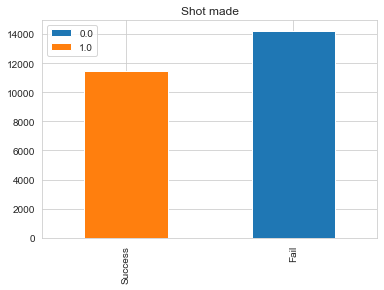

In [77]:
# 가장 먼저 labeled data의 분포를 확인.
def bar_chart(feature, ax=None):
    success = train[train['shot_made_flag']==1][feature].value_counts()
    fail = train[train['shot_made_flag']==0][feature].value_counts()
    df = pd.DataFrame([success, fail])
    df.index = ['Success', 'Fail']
    df.plot(kind='bar', stacked=True, ax=ax)

ax = plt.axes()
ax.set_title('Shot made')
bar_chart('shot_made_flag', ax)
plt.show()


In [78]:
# 큰 차이가 없기 때문에 이럴때는 숫자로 확인하는 것도 좋은 방법!
print(train['shot_made_flag'].value_counts() / len(train.index))

0.0    0.553839
1.0    0.446161
Name: shot_made_flag, dtype: float64


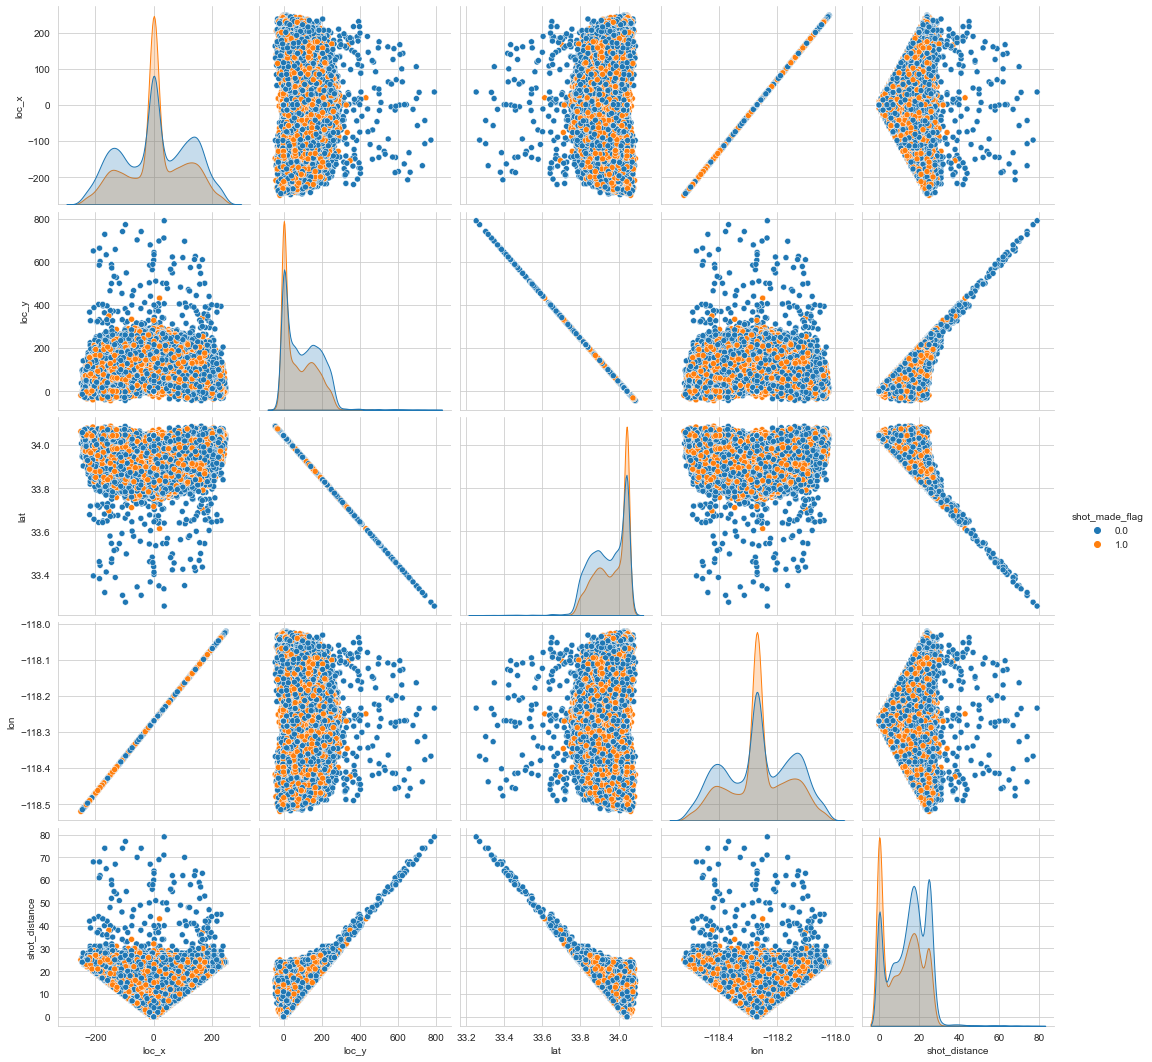

In [79]:
# loc_x, loc_y 데이터의 의미를 잘 모르겠다. 이를 시각화해서 보자. 
# 위도-경도, x-y 이런 데이터들은 짝지어서 시각화했을 때 의미를 알수 있음. seaboran library의 pairplot을 이용.

sns.pairplot(data, vars=['loc_x', 'loc_y', 'lat', 'lon', 'shot_distance'], hue='shot_made_flag', size=3)
plt.show()

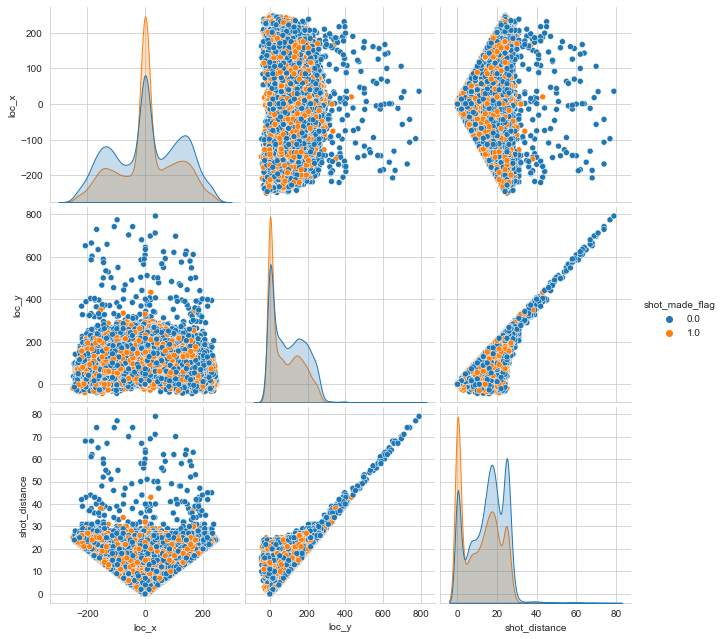

In [80]:
# loc_x, loc_y 로 위도 경도와 같은 데이터를 얻을 수 있음.

sns.pairplot(data, vars=['loc_x', 'loc_y', 'shot_distance'], hue='shot_made_flag', size=3)
plt.show()

In [81]:
# 종류가 많은 경우에는 전 강의에서 시각화한 stack 방식의 시각화보다 
# seaborn 라이브러리의 countplot을 이용해서 가로로 쭉 보는게 쉽다.
def count_plot(column, ax):
    sns.countplot(x=column, hue='shot_made_flag', data=train, ax=ax)

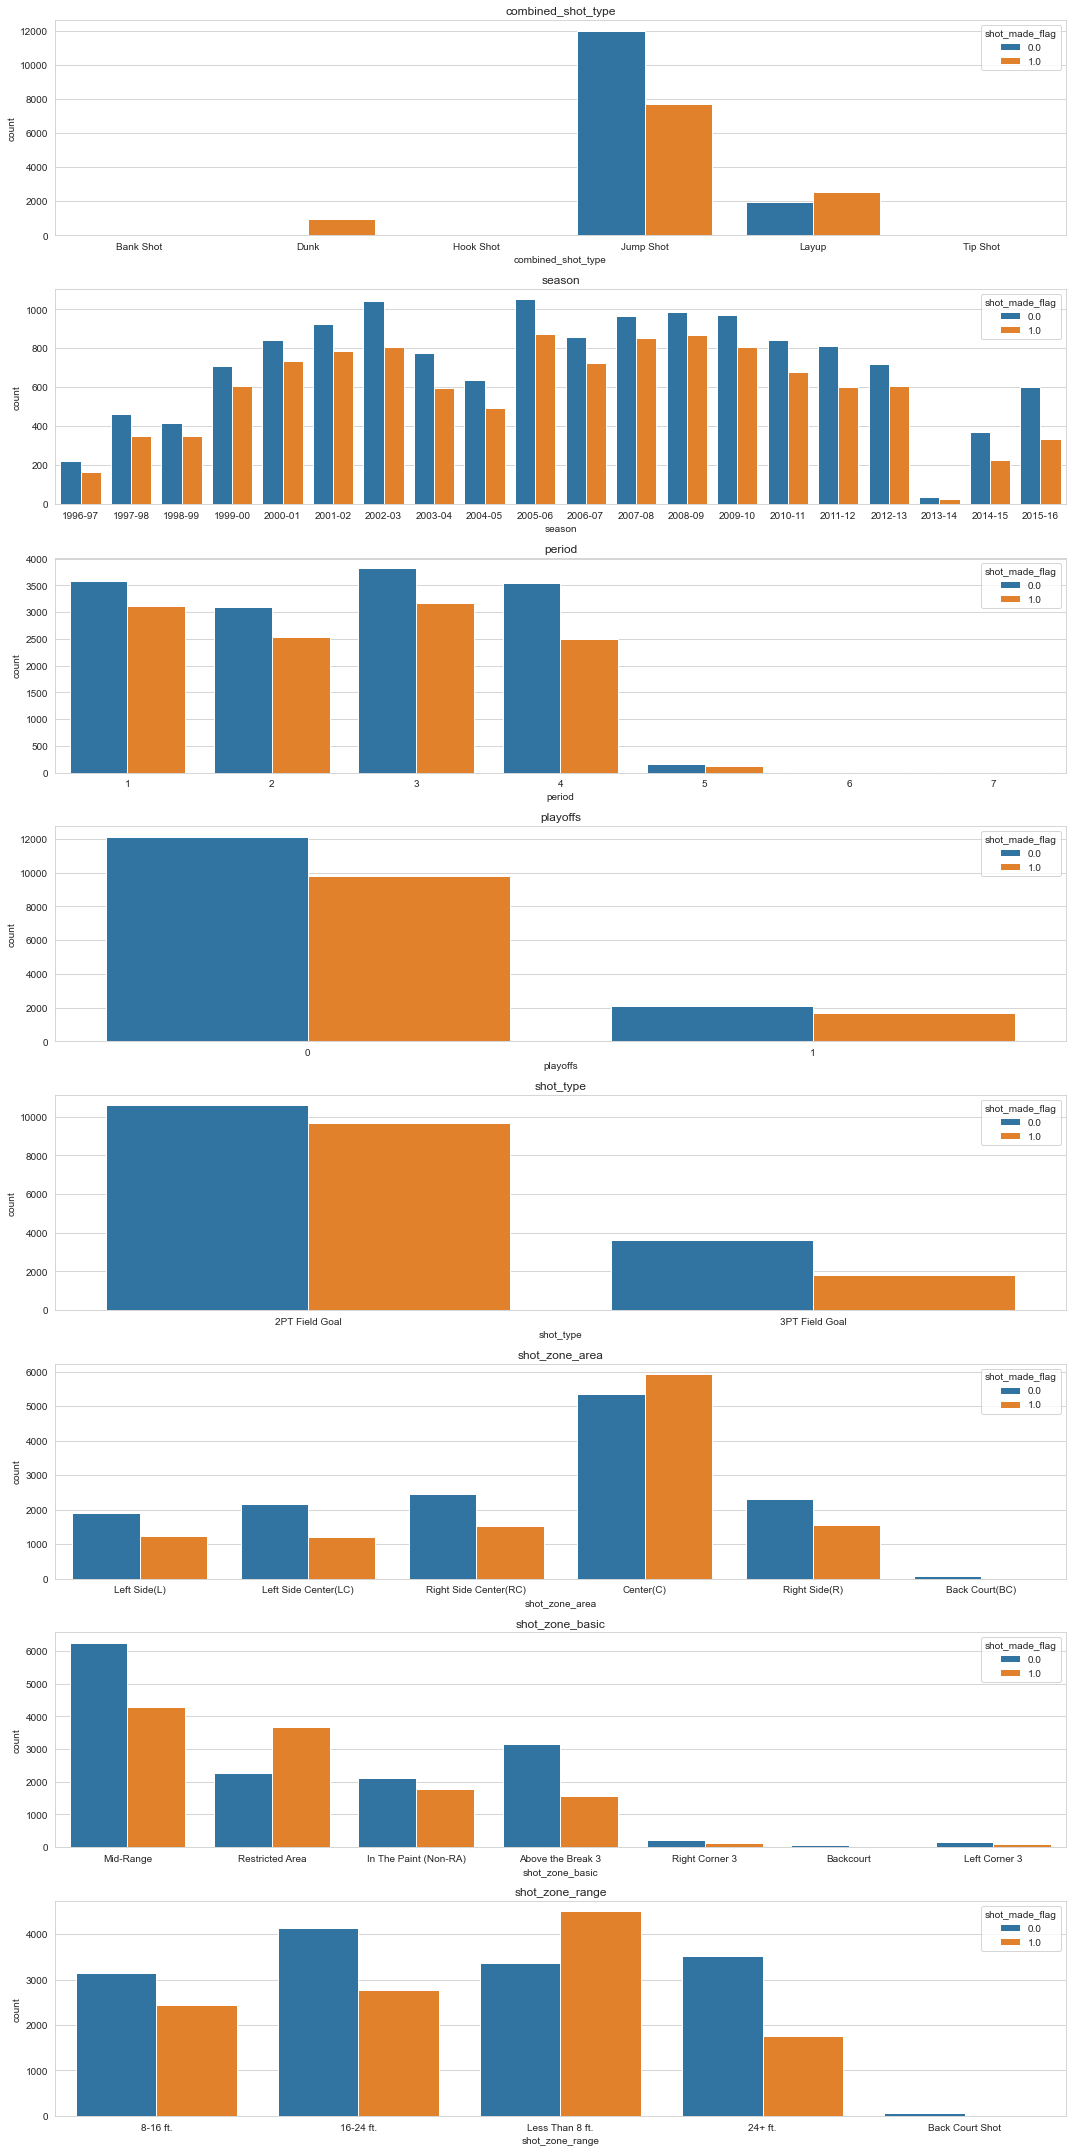

In [82]:
f, axarr = plt.subplots(8, figsize=(15, 30))

categorical_data = ["combined_shot_type", "season", "period", "playoffs", "shot_type", "shot_zone_area",
                   "shot_zone_basic", "shot_zone_range"]

for idx, category_data in enumerate(categorical_data, 0):
    count_plot(category_data, axarr[idx])
    axarr[idx].set_title(category_data)

plt.tight_layout()
plt.show()




In [83]:
def print_probability(column):
    print(train[train['shot_made_flag']==1][column].value_counts() / (train[train['shot_made_flag']==1][column].value_counts()+train[train['shot_made_flag']==0][column].value_counts()))

In [84]:
# 비슷 비슷해 보인다! 조금 더 명시적으로

for category_data in categorical_data:
    print_probability(category_data)

Bank Shot    0.791667
Dunk         0.928030
Hook Shot    0.535433
Jump Shot    0.391071
Layup        0.565093
Tip Shot     0.348684
Name: combined_shot_type, dtype: float64
1996-97    0.422977
1997-98    0.430864
1998-99    0.458824
1999-00    0.460366
2000-01    0.466667
2001-02    0.458431
2002-03    0.436285
2003-04    0.433260
2004-05    0.436557
2005-06    0.453742
2006-07    0.457885
2007-08    0.468389
2008-09    0.467855
2009-10    0.453725
2010-11    0.446417
2011-12    0.425847
2012-13    0.457831
2013-14    0.406780
2014-15    0.376054
2015-16    0.356223
Name: season, dtype: float64
1    0.465672
2    0.448802
3    0.453442
4    0.413702
5    0.442857
6    0.466667
7    0.428571
Name: period, dtype: float64
0    0.446420
1    0.444651
Name: playoffs, dtype: float64
2PT Field Goal    0.477348
3PT Field Goal    0.329268
Name: shot_type, dtype: float64
Back Court(BC)           0.013889
Center(C)                0.525556
Left Side Center(LC)     0.361177
Left Side(L)            

In [85]:
# continous 데이터 분석# contin 

def draw_facetgrid(feature):
    facet = sns.FacetGrid(train, hue="shot_made_flag", aspect=5)
    facet.map(sns.kdeplot, feature, shade=True)
    facet.set(xlim=(0, train[feature].max()))
    # survived 라벨을 표시.
    facet.add_legend() 
    plt.show()

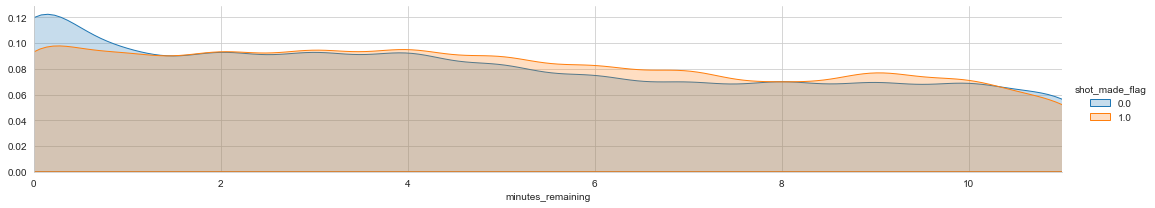

In [86]:
draw_facetgrid('minutes_remaining')

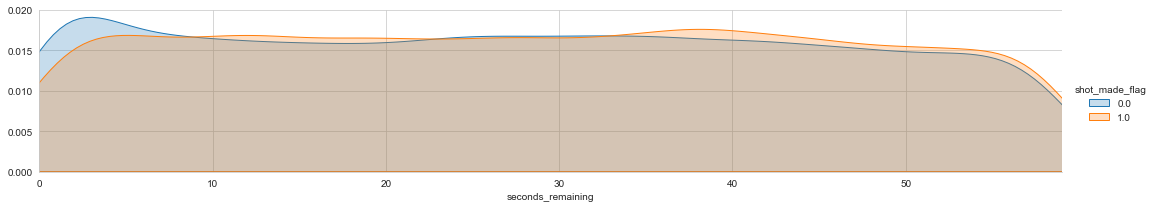

In [87]:
draw_facetgrid('seconds_remaining')

## 3.3 데이터를 조합해 보자

### 시즌별 + 슟 타입

In [88]:
train['shot_made_flag'] = train['shot_made_flag'].astype('int64')
train.groupby(['season', 'combined_shot_type'])['shot_made_flag'].sum() / (train.groupby(['season', 'combined_shot_type'])['shot_made_flag'].count())

season   combined_shot_type
1996-97  Bank Shot                  NaN
         Dunk                  0.947368
         Hook Shot                  NaN
         Jump Shot             0.380567
         Layup                 0.450450
                                 ...   
2015-16  Dunk                  1.000000
         Hook Shot             0.272727
         Jump Shot             0.327711
         Layup                 0.623529
         Tip Shot                   NaN
Name: shot_made_flag, Length: 120, dtype: float64

In [89]:
train['shot_made_flag'] = train['shot_made_flag'].astype('category')


# 4. Feature Engineering


## 4.1 Data cleaning

#### 필요 없는 데이터 제거, 먼저 제거 함으로써 조금 더 다룰 데이터를 줄일 수 있음.

In [90]:
# 필요없는 column들 제거

## team_id , 오직 한 팀 LA lakers에서 선수생활을 함.
data_cp = data.copy()
target = data_cp['shot_made_flag'].copy()

print(train.team_id.value_counts())

1610612747    25697
Name: team_id, dtype: int64


In [91]:
data_cp.drop('team_id', axis=1, inplace=True)
data_cp.drop('team_name', axis=1, inplace=True)

# lat, lon -> loc_x, loc_y 로 대치가능
data_cp.drop('lat', axis=1, inplace=True)
data_cp.drop('lon', axis=1, inplace=True)

# game_id, game_event_id are independent
data_cp.drop('game_id', axis=1, inplace=True)
data_cp.drop('game_event_id', axis=1, inplace=True)

data_cp.drop('shot_made_flag', axis=1, inplace=True)

In [92]:
data.head(2)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent
shot_id,,,,,,,,,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
2,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR


## 4.2 Data Transformation

In [93]:
# 시간 그래프를 보면 시간이 적게 남았을 때 안들어갈 확률이 높음.

data_cp['seconds_from_period_end'] = 60 * data_cp['minutes_remaining'] + data_cp['seconds_remaining']
data_cp['last_5_sec_in_period'] = data_cp['seconds_from_period_end'] < 5

In [94]:
data_cp.drop('minutes_remaining', axis=1, inplace=True)
data_cp.drop('seconds_remaining', axis=1, inplace=True)
data_cp.drop('seconds_from_period_end', axis=1, inplace=True)

In [95]:
## home, away mapping
data_cp['home_away'] = data_cp['matchup'].str.contains('vs').astype('int')
data_cp.drop('matchup', axis=1, inplace=True)

In [96]:
data_cp.head(1)

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,season,shot_distance,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,opponent,last_5_sec_in_period,home_away
shot_id,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,167,72,1,0,2000-01,18,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,2000-10-31,POR,False,0


In [97]:
# Game date를 년/월/일로 분리
data_cp['game_date'] = pd.to_datetime(data_cp['game_date'])
data_cp['game_year'] = data_cp['game_date'].dt.year
data_cp['game_month'] = data_cp['game_date'].dt.month
data_cp.drop('game_date', axis=1, inplace=True)

In [98]:
# Loc_x, and loc_y binning 25 단위로
data_cp['loc_x'] = pd.cut(data_cp['loc_x'], 25)
data_cp['loc_y'] = pd.cut(data_cp['loc_y'], 25)

# Replace 20 least common action types with value 'Other'
rare_action_types = data_cp['action_type'].value_counts().sort_values().index.values[:20]
data_cp.loc[data_cp['action_type'].isin(rare_action_types), 'action_type'] = 'Other'

In [99]:
data_cp.head(10)

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,season,shot_distance,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,last_5_sec_in_period,home_away,game_year,game_month
shot_id,,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,"(148.4, 168.32]","(56.2, 89.6]",1,0,2000-01,18,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,POR,False,0,2000,10
2,Jump Shot,Jump Shot,"(-170.32, -150.4]","(-10.6, 22.8]",1,0,2000-01,15,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,False,0,2000,10
3,Jump Shot,Jump Shot,"(-110.56, -90.64]","(123.0, 156.4]",1,0,2000-01,16,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,POR,False,0,2000,10
4,Jump Shot,Jump Shot,"(128.48, 148.4]","(156.4, 189.8]",1,0,2000-01,22,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,POR,False,0,2000,10
5,Driving Dunk Shot,Dunk,"(-10.96, 8.96]","(-10.6, 22.8]",2,0,2000-01,0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,POR,False,0,2000,10
6,Jump Shot,Jump Shot,"(-150.4, -130.48]","(-44.835, -10.6]",3,0,2000-01,14,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,False,0,2000,10
7,Layup Shot,Layup,"(-10.96, 8.96]","(-10.6, 22.8]",3,0,2000-01,0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,POR,False,0,2000,10
8,Jump Shot,Jump Shot,"(-10.96, 8.96]","(22.8, 56.2]",3,0,2000-01,2,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,POR,False,0,2000,10
9,Jump Shot,Jump Shot,"(-70.72, -50.8]","(89.6, 123.0]",3,0,2000-01,12,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,POR,False,0,2000,10


In [100]:
categorial_cols  = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'game_year',
    'game_month', 'opponent', 'loc_x', 'loc_y']

for cc in categorial_cols:
    dummies = pd.get_dummies(data_cp[cc])
    dummies = dummies.add_prefix("{}#".format(cc))
    data_cp.drop(cc, axis=1, inplace=True)
    data_cp = data_cp.join(dummies)


In [101]:
data_cp.head(3)

,playoffs,shot_distance,last_5_sec_in_period,home_away,action_type#Alley Oop Dunk Shot,action_type#Alley Oop Layup shot,action_type#Driving Dunk Shot,action_type#Driving Finger Roll Layup Shot,action_type#Driving Finger Roll Shot,action_type#Driving Jump shot,action_type#Driving Layup Shot,action_type#Driving Reverse Layup Shot,action_type#Driving Slam Dunk Shot,action_type#Dunk Shot,action_type#Fadeaway Bank shot,action_type#Fadeaway Jump Shot,action_type#Finger Roll Layup Shot,action_type#Finger Roll Shot,action_type#Floating Jump shot,action_type#Follow Up Dunk Shot,action_type#Hook Shot,action_type#Jump Bank Shot,action_type#Jump Hook Shot,action_type#Jump Shot,action_type#Layup Shot,action_type#Other,action_type#Pullup Jump shot,action_type#Putback Layup Shot,action_type#Reverse Dunk Shot,action_type#Reverse Layup Shot,action_type#Reverse Slam Dunk Shot,action_type#Running Bank shot,action_type#Running Dunk Shot,action_type#Running Hook Shot,action_type#Running Jump Shot,action_type#Running Layup Shot,action_type#Slam Dunk Shot,action_type#Step Back Jump shot,action_type#Tip Shot,action_type#Turnaround Bank shot,action_type#Turnaround Fadeaway shot,action_type#Turnaround Jump Shot,combined_shot_type#Bank Shot,combined_shot_type#Dunk,combined_shot_type#Hook Shot,combined_shot_type#Jump Shot,combined_shot_type#Layup,combined_shot_type#Tip Shot,period#1,period#2,period#3,period#4,period#5,period#6,period#7,season#1996-97,season#1997-98,season#1998-99,season#1999-00,season#2000-01,season#2001-02,season#2002-03,season#2003-04,season#2004-05,season#2005-06,season#2006-07,season#2007-08,season#2008-09,season#2009-10,season#2010-11,season#2011-12,season#2012-13,season#2013-14,season#2014-15,season#2015-16,shot_type#2PT Field Goal,shot_type#3PT Field Goal,shot_zone_area#Back Court(BC),shot_zone_area#Center(C),shot_zone_area#Left Side Center(LC),shot_zone_area#Left Side(L),shot_zone_area#Right Side Center(RC),shot_zone_area#Right Side(R),shot_zone_basic#Above the Break 3,shot_zone_basic#Backcourt,shot_zone_basic#In The Paint (Non-RA),shot_zone_basic#Left Corner 3,shot_zone_basic#Mid-Range,shot_zone_basic#Restricted Area,shot_zone_basic#Right Corner 3,shot_zone_range#16-24 ft.,shot_zone_range#24+ ft.,shot_zone_range#8-16 ft.,shot_zone_range#Back Court Shot,shot_zone_range#Less Than 8 ft.,game_year#1996,game_year#1997,game_year#1998,game_year#1999,game_year#2000,game_year#2001,game_year#2002,game_year#2003,game_year#2004,game_year#2005,game_year#2006,game_year#2007,game_year#2008,game_year#2009,game_year#2010,game_year#2011,game_year#2012,game_year#2013,game_year#2014,game_year#2015,game_year#2016,game_month#1,game_month#2,game_month#3,game_month#4,game_month#5,game_month#6,game_month#10,game_month#11,game_month#12,opponent#ATL,opponent#BKN,opponent#BOS,opponent#CHA,opponent#CHI,opponent#CLE,opponent#DAL,opponent#DEN,opponent#DET,opponent#GSW,opponent#HOU,opponent#IND,opponent#LAC,opponent#MEM,opponent#MIA,opponent#MIL,opponent#MIN,opponent#NJN,opponent#NOH,opponent#NOP,opponent#NYK,opponent#OKC,opponent#ORL,opponent#PHI,opponent#PHX,opponent#POR,opponent#SAC,opponent#SAS,opponent#SEA,opponent#TOR,opponent#UTA,opponent#VAN,opponent#WAS,"loc_x#(-250.498, -230.08]","loc_x#(-230.08, -210.16]","loc_x#(-210.16, -190.24]","loc_x#(-190.24, -170.32]","loc_x#(-170.32, -150.4]","loc_x#(-150.4, -130.48]","loc_x#(-130.48, -110.56]","loc_x#(-110.56, -90.64]","loc_x#(-90.64, -70.72]","loc_x#(-70.72, -50.8]","loc_x#(-50.8, -30.88]","loc_x#(-30.88, -10.96]","loc_x#(-10.96, 8.96]","loc_x#(8.96, 28.88]","loc_x#(28.88, 48.8]","loc_x#(48.8, 68.72]","loc_x#(68.72, 88.64]","loc_x#(88.64, 108.56]","loc_x#(108.56, 128.48]","loc_x#(128.48, 148.4]","loc_x#(148.4, 168.32]","loc_x#(168.32, 188.24]","loc_x#(188.24, 208.16]","loc_x#(208.16, 228.08]","loc_x#(228.08, 248.0]","loc_y#(-44.835, -10.6]","loc_y#(-10.6, 22.8]","loc_y#(22.8, 56.2]","loc_y#(56.2, 89.6]","loc_y#(89.6, 123.0]","loc_y#(123.0, 156.4]","loc_y#(156.4, 189.8]","loc_y#(189.8, 223.2]","loc_y#(223.2

## 4.3 feature selection

#### feature의 수를 줄이자.

In [102]:
unknown_mask = data['shot_made_flag'].isnull()

# 제출할 때 사용할 데이터 분리 (즉, 예측해야 하는 데이터)
data_submit = data_cp[unknown_mask]

# 학습용 데이터 분리
X = data_cp[~unknown_mask]
Y = target[~unknown_mask]

In [103]:
from sklearn.decomposition import PCA, KernelPCA
#from sklearn.cross_validation import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier



In [104]:
from sklearn.model_selection import train_test_split

In [105]:
threshold = 0.90
vt = VarianceThreshold().fit(X)

# Find feature names
feat_var_threshold = data_cp.columns[vt.variances_ > threshold * (1-threshold)]
feat_var_threshold

Index(['playoffs', 'shot_distance', 'home_away', 'action_type#Jump Shot',
       'combined_shot_type#Jump Shot', 'combined_shot_type#Layup', 'period#1',
       'period#2', 'period#3', 'period#4', 'shot_type#2PT Field Goal',
       'shot_type#3PT Field Goal', 'shot_zone_area#Center(C)',
       'shot_zone_area#Left Side Center(LC)', 'shot_zone_area#Left Side(L)',
       'shot_zone_area#Right Side Center(RC)', 'shot_zone_area#Right Side(R)',
       'shot_zone_basic#Above the Break 3',
       'shot_zone_basic#In The Paint (Non-RA)', 'shot_zone_basic#Mid-Range',
       'shot_zone_basic#Restricted Area', 'shot_zone_range#16-24 ft.',
       'shot_zone_range#24+ ft.', 'shot_zone_range#8-16 ft.',
       'shot_zone_range#Less Than 8 ft.', 'game_month#1', 'game_month#2',
       'game_month#3', 'game_month#4', 'game_month#11', 'game_month#12',
       'loc_x#(-10.96, 8.96]', 'loc_y#(-10.6, 22.8]', 'loc_y#(22.8, 56.2]',
       'loc_y#(123.0, 156.4]'],
      dtype='object')

In [106]:
model = RandomForestClassifier()
model.fit(X, Y)

feature_imp = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["importance"])
feat_imp_20 = feature_imp.sort_values("importance", ascending=False).head(20).index
feat_imp_20

Index(['shot_distance', 'action_type#Jump Shot', 'home_away', 'period#3',
       'period#1', 'period#2', 'period#4', 'action_type#Layup Shot',
       'game_month#3', 'game_month#1', 'game_month#2', 'game_month#4',
       'combined_shot_type#Dunk', 'game_month#12', 'game_month#11', 'playoffs',
       'opponent#SAS', 'action_type#Driving Layup Shot', 'loc_y#(-10.6, 22.8]',
       'opponent#DEN'],
      dtype='object')

In [107]:
features = np.hstack([
        feat_var_threshold, 
        feat_imp_20,
    ])

features = np.unique(features)
print('Final features set:\n')
for f in features:
    print("\t-{}".format(f))

Final features set:

	-action_type#Driving Layup Shot
	-action_type#Jump Shot
	-action_type#Layup Shot
	-combined_shot_type#Dunk
	-combined_shot_type#Jump Shot
	-combined_shot_type#Layup
	-game_month#1
	-game_month#11
	-game_month#12
	-game_month#2
	-game_month#3
	-game_month#4
	-home_away
	-loc_x#(-10.96, 8.96]
	-loc_y#(-10.6, 22.8]
	-loc_y#(123.0, 156.4]
	-loc_y#(22.8, 56.2]
	-opponent#DEN
	-opponent#SAS
	-period#1
	-period#2
	-period#3
	-period#4
	-playoffs
	-shot_distance
	-shot_type#2PT Field Goal
	-shot_type#3PT Field Goal
	-shot_zone_area#Center(C)
	-shot_zone_area#Left Side Center(LC)
	-shot_zone_area#Left Side(L)
	-shot_zone_area#Right Side Center(RC)
	-shot_zone_area#Right Side(R)
	-shot_zone_basic#Above the Break 3
	-shot_zone_basic#In The Paint (Non-RA)
	-shot_zone_basic#Mid-Range
	-shot_zone_basic#Restricted Area
	-shot_zone_range#16-24 ft.
	-shot_zone_range#24+ ft.
	-shot_zone_range#8-16 ft.
	-shot_zone_range#Less Than 8 ft.


In [109]:

components = 8
pca = PCA(n_components=components).fit(X)

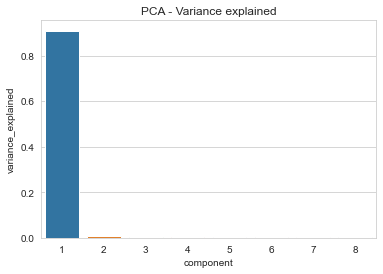

In [110]:

pca_variance_explained_df= pd.DataFrame({
    "component": np.arange(1, components+1),
    "variance_explained": pca.explained_variance_ratio_            
    })

ax = sns.barplot(x='component', y='variance_explained', data=pca_variance_explained_df)
ax.set_title("PCA - Variance explained")
plt.show()